In [71]:
from qiskit import QuantumCircuit, QuantumRegister, AncillaRegister, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from math import pi

In [80]:
class QPP:
    def __init__(self, *args):
        self.total_data_qubits = len(args)
        self.total_qubits = self.total_data_qubits+1
        
        self.phase_qubit = AncillaRegister(1, name="ancilla")
        self.circuit = QuantumCircuit(self.phase_qubit, *args)
        
        self.circuit_measurement = QuantumCircuit(self.total_qubits, self.total_data_qubits)
        self.circuit_measurement.measure(range(1, self.total_qubits), range(self.total_data_qubits))
        
        self.backend = Aer.get_backend("aer_simulator")
    
    def add_input(self, bit_string):
        assert len(bit_string) == self.total_data_qubits, "Different amount of registers" 
        
        bit_string = self.parse_bit_string(bit_string)
    
        for qubit, bit in enumerate(bit_string):
            if(bit == '1'):
                self.circuit.x(qubit+1)
        self.add_barrier()
        
    def parse_bit_string(self, bit_string):
        return bit_string[::-1]
        
    def add_barrier(self):
        self.circuit.barrier()
    
    def prepare(self, bit_string, show_oracle=False, show_state_vector=False):
        self.add_oracle(bit_string, show_oracle)
        if(show_state_vector):
            self.show_state_vector()
        self.add_measurement()
            
    def add_oracle(self, bit_string, show_oracle):
        assert len(bit_string) <= self.total_data_qubits, "Different amount of registers" 
        
        bit_string = self.parse_bit_string(bit_string)
        qubits_iterator = range(self.total_qubits)
        
        oracle = QuantumCircuit(self.total_qubits, name="Oracle")
        
        oracle.x(0)
        oracle.h(qubits_iterator)
        
        for qubit, bit in enumerate(bit_string): 
            if(bit == '1'):
                oracle.cx(qubit+1, 0)
                
        oracle.h(qubits_iterator)
        
        if(show_oracle): 
            display(oracle.draw('mpl'))
        
        self.circuit.append(oracle, qubits_iterator)
        
    def show_state_vector(self):
        display(Statevector(self.circuit).draw('latex'))
        
    def add_measurement(self):
        self.circuit.compose(self.circuit_measurement, inplace=True)
    
    def measure(self):
        transpiled_circuit = transpile(self.circuit, self.backend)
        results = self.backend.run(transpiled_circuit, shots=1000).result().get_counts()
        display(plot_histogram(results))
    
    def show(self):
        display(self.circuit.draw("mpl"))
        

In [64]:
all_documents = QuantumRegister(1, name="documents")
false_info = QuantumRegister(1, name="falsification")
wanted = QuantumRegister(1, name="wanted")
bribe = QuantumRegister(1, name="bribe")

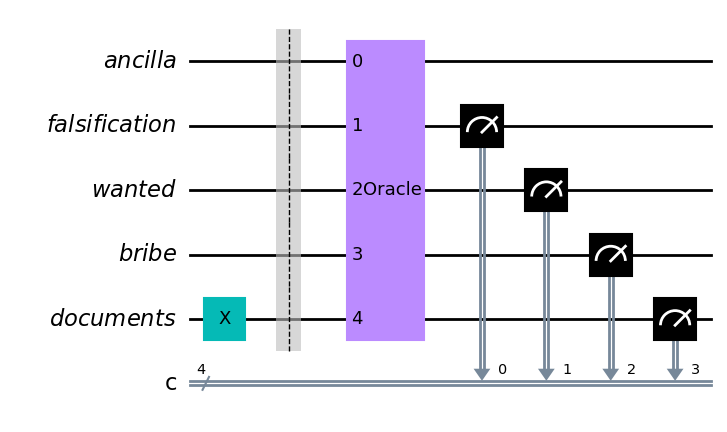

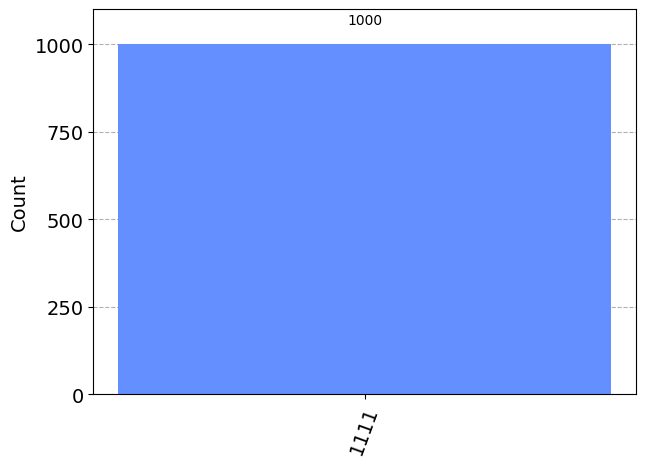

In [81]:
algorithm = QPP(false_info, wanted, bribe, all_documents)
algorithm.add_input("1000")
algorithm.prepare(bit_string="0111", show_oracle=False, show_state_vector=False)
algorithm.show()
algorithm.measure()

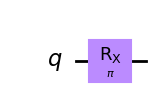

<IPython.core.display.Latex object>

In [91]:
test = QuantumCircuit(1)
test.rx(pi, 0)
display(test.draw('mpl'))
display(Statevector(test).draw('latex'))

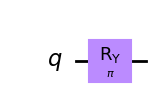

<IPython.core.display.Latex object>

In [95]:
test = QuantumCircuit(1)
test.ry(pi, 0)
display(test.draw('mpl'))
display(Statevector(test).draw('latex'))

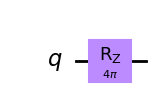

<IPython.core.display.Latex object>

In [105]:
test = QuantumCircuit(1)
test.rz(4*pi, 0)
display(test.draw('mpl'))
display(Statevector(test).draw('latex'))